<a href="https://colab.research.google.com/github/AmblessedUche/Machine_learning/blob/main/Amblessed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question:**
As a beginner ML Engineer, your goal is to build a machine learning pipeline that includes data cleaning, formatting and expolatory data anlaysis. Choose any dataset that interests you (you can find open datasets on platforms like kaggle, UCI Machine Learning Repository or even scrape your own from a public source).

**Instructions:**
1. **Data Cleaning:** Start by examining the dataset to identify any issues. Address common problems like:
   - Missing values
   - Duplicates
   - Outliers or incorrect entries

2. **Data Formatting:** Ensure the dataset is ready for model training by:
   - Converting categorical variables to numerical representations if necessary (e.g., one-hot encoding or label encoding).
   - Normalizing or standardizing numerical features if the algorithm you plan to use would benefit from it.

3. **Exploratory Data Analysis (EDA):**
   - Visualize key patterns and relationships in the data (e.g., correlation heatmap, pair plots, distribution of classes).
   - Document insights you gather from the data, which may help with model selection or feature engineering.

4. **Feature Engineering (optional):** Create additional features that might improve the model's performance.

5. **Train a Simple Model:** Using your cleaned and formatted data, train a basic model (such as linear regression, decision tree, or a simple classifier) to get a sense of how machine learning models work. Evaluate it with a suitable metric (like accuracy, mean squared error, etc.).

**Deliverables:**
- A brief report or notebook documenting the cleaning, formatting, EDA, and model training process, along with any observations about your dataset.

In [ ]:
# Linking my google drive to my colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Changing my directory to my colab notebook and listing the files present
%cd /content/drive/MyDrive/Colab Notebooks/
!ls

/content/drive/MyDrive/Colab Notebooks
 3mtt_assignment.ipynb	'Amazon project.ipynb'	 test.ft.txt.bz2
 amazon_alexa.tsv	 Amblessed.ipynb	 vgsales.csv


In [ ]:
# Importing pandas library to load the dataset
import pandas as pd

In [ ]:
# Loading and reading the file
data = pd.read_csv('vgsales.csv', sep=',')
print(data.columns)

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


In [ ]:
# Impute values used for filling in missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
data['Rank'] = imputer.fit_transform(data[['Rank']])
data['Year'] = imputer.fit_transform(data[['Year']])

In [ ]:
# Understanding the structure and statistics of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  float64
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [ ]:
# Spotting irregularities
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1.0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2.0,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3.0,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4.0,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5.0,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
# Spotting irregularities
data.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596.0,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597.0,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598.0,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599.0,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600.0,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [ ]:
# Identify Missing Values
data.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [ ]:
# Drop Rows/columns
data.dropna()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1.0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2.0,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3.0,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4.0,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5.0,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596.0,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597.0,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598.0,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599.0,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
# filling in missing data in the publisher column
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
data['Publisher'] = imputer.fit_transform(data[['Publisher']]).ravel() # flatten the 2D into the 1 dimensional array

In [ ]:
# Identifying Missing values
data.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [ ]:
# Checking and Removing duplicates
data.duplicated().sum()

0

<Axes: >

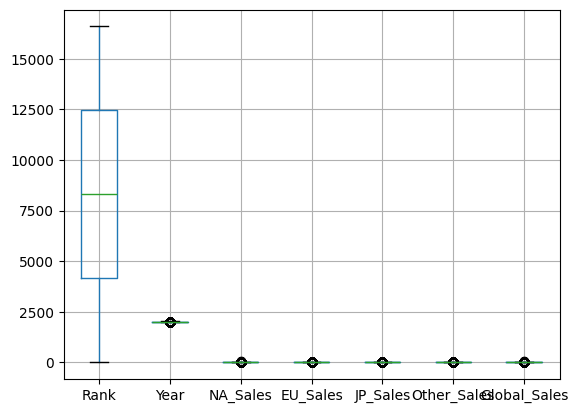

In [ ]:
# Outliers
data.boxplot()

In [ ]:
# Data Formatting
for column in data.select_dtypes(include=['object']).columns:
    data = pd.get_dummies(data, columns=[column], drop_first=True)

In [ ]:
# Normalization/Standardization
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
data['NA_Sales'] = scaler.fit_transform(data[['NA_Sales']])

# EDA / Insights
""" My Dataframe object has no attribute heatmap, pairplot and countplot. """

In [ ]:
# Training and Testing of the Model
from sklearn.model_selection import train_test_split
x = data.drop('Global_Sales', axis=1)
y = data['Global_Sales']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, accuracy_score
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 2282584844.954157
